[1, 90878.1, 281.964]
[1, 68.9418, 480.623]
[1, 55301.5, 0.525315]
[1, 449203.0, 0.939987]
[1, 0.00963019, 277491.0]
[1, 3.04491, 0.661458]
[1, 5288.46, 8178.12]
[1, 790.117, 32.6206]
[1, 0.602602, 0.00654369]
[1, 176.342, 0.249817]
[1, 51082.1, 4.21455]
[1, 81.4381, 807.531]
[1, 0.0454896, 0.00370877]
[1, 76.441, 72434.4]
[1, 8770.43, 0.0658852]
[1, 65.7757, 1.66944]
[1, 968804.0, 2.10122]
[1, 510.527, 519300.0]
[1, 52026.3, 0.0444857]
[1, 0.07857, 0.926457]
[1, 85211.3, 0.00461975]
[1, 41.8645, 71447.0]
[1, 0.0316441, 6.69015]
[1, 0.00481756, 7.32441]
[1, 0.025531, 9.801]
[1, 0.00801295, 0.48182]
[1, 632279.0, 249.679]
[1, 0.00541419, 51.0141]
[1, 347564.0, 943.98]
[1, 195.359, 183010.0]
[1, 5654.31, 83803.4]
[1, 113567.0, 0.097968]
[1, 940.566, 0.00305538]
[1, 122235.0, 0.799781]
[1, 0.0717113, 7664.78]
[1, 426.354, 0.0866794]
[1, 796371.0, 9.18582]
[1, 59115.3, 0.00143236]
[1, 897699.0, 488018.0]
[1, 894528.0, 783.195]
[1, 65878.7, 0.728753]
[1, 3696.38, 90.3137]
[1, 852.968, 4.541

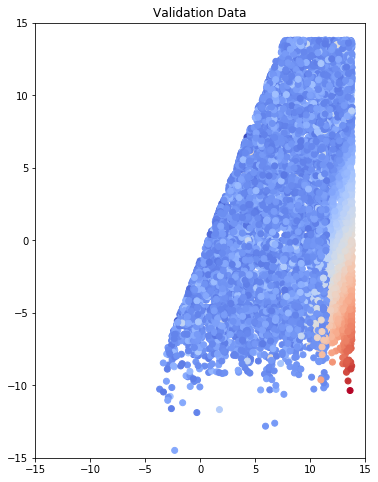

In [9]:
from mpmath import *
mp.pretty = True
import numpy as np
import random as rd

file = open("data.txt", "w")
file.write("{},{},{},{},{},{},{},{},{}\n".format('"a"', '"b"', '"c"', '"re1"', '"re2"', '"x11"', '"x12"', '"x21"', '"x22"'))
file.close()
file = open("data.txt", "a")
for i in range(0, 100000):
    co = ([(rd.randint(2, 999999) * power(10, rd.randint(-4, 4))) / 10000 for i in range(3)])
    co[0] = 1
    if i % 1000 == 0:
        print(co)
    try:
        a = co[0]
        b = co[1]
        c = co[2]
        if b * b - 4 * a * c < 0:
            continue
        mp.dps = 7
        # print(co)
        x11 = (-b + sqrt(b * b - 4 * a * c)) / 2 / a
        x12 = (-b - sqrt(b * b - 4 * a * c)) / 2 / a
        # print(x11)
        # print(x12)
        mp.dps = 25
        # print(co)
        x21 = (-b + sqrt(b * b - 4 * a * c)) / 2 / a
        x22 = (-b - sqrt(b * b - 4 * a * c)) / 2 / a
        # print(x21)
        # print(x22)
        re1 = (abs((x22 - x12) / x22))
        re2 = (abs((x21 - x11) / x21))
        # print(re1)
        # print(re2)
        file.write("{},{},{},{},{},{},{},{},{}\n".format(log(a), log(b), log(c), log(re1), log(re2), x11, x12, x21, x22))
        
    except Exception as e:
        continue
        # print(str(e))

file.close()







35270   -21.8
35271   -23.7
35272   -19.2
35273   -29.4
35274   -18.1
         ... 
55265   -19.5
55266   -32.0
55267   -18.6
55268   -20.1
55269   -25.0
Name: re1, Length: 20000, dtype: float64


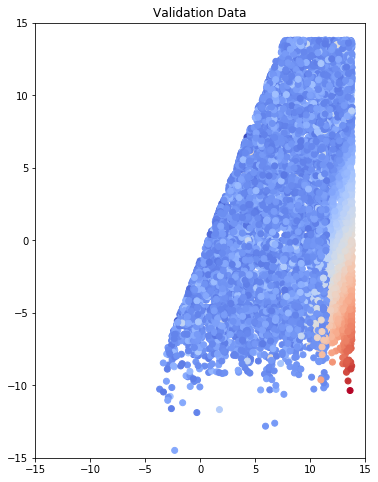

In [10]:

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset
import pdb

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

california_housing_dataframe = pd.read_csv("data.txt", sep=",")


def preprocess_features(california_housing_dataframe):
    selected_features = california_housing_dataframe[["a", "b", "c", "re1", "re2", "x11", "x12", "x21", "x22"]]
    processed_features = selected_features.copy()
    # Create a synthetic feature.
    return processed_features

def preprocess_targets(california_housing_dataframe):
    output_targets = pd.DataFrame()
    # Scale the target to be in units of thousands of dollars.
    output_targets["re1"] = california_housing_dataframe["re1"]
    return output_targets

training_examples = preprocess_features(california_housing_dataframe.head(40000))
training_examples.describe()

training_targets = preprocess_targets(california_housing_dataframe.head(40000))
training_targets.describe()

validation_examples = preprocess_features(california_housing_dataframe.tail(20000))
validation_targets = preprocess_targets(california_housing_dataframe.tail(20000))

print(validation_targets["re1"])


plt.figure(figsize=(13, 8))

ax = plt.subplot(1, 2, 1)
ax.set_title("Validation Data")

ax.set_autoscaley_on(False)
ax.set_ylim([-15, 15])
ax.set_autoscalex_on(False)
ax.set_xlim([-15, 15])
plt.scatter(validation_examples["b"],
            validation_examples["c"],
            cmap="coolwarm",
            c=validation_targets["re1"] / validation_targets["re1"].max())

# ax = plt.subplot(1,2,2)
# ax.set_title("Training Data")

# ax.set_autoscaley_on(False)
# ax.set_ylim([32, 43])
# ax.set_autoscalex_on(False)
# ax.set_xlim([-126, -112])
# plt.scatter(training_examples["b"],
#             training_examples["c"],
#             cmap="coolwarm",
#             c=training_targets["re1"] / training_targets["re1"].max())
_ = plt.plot()

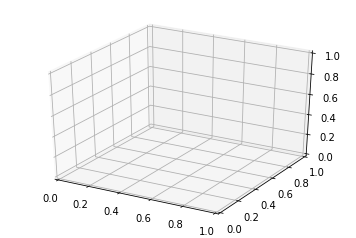

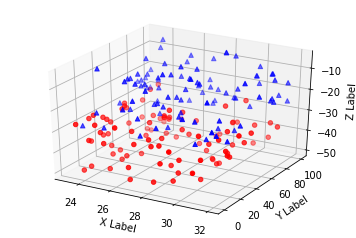

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(validation_examples["b"], ys, zs, c=c, marker=m)

'''
==============
3D scatterplot
==============

Demonstration of a basic scatterplot in 3D.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

